# Нелинейное программирование для определения предельной нагрузки

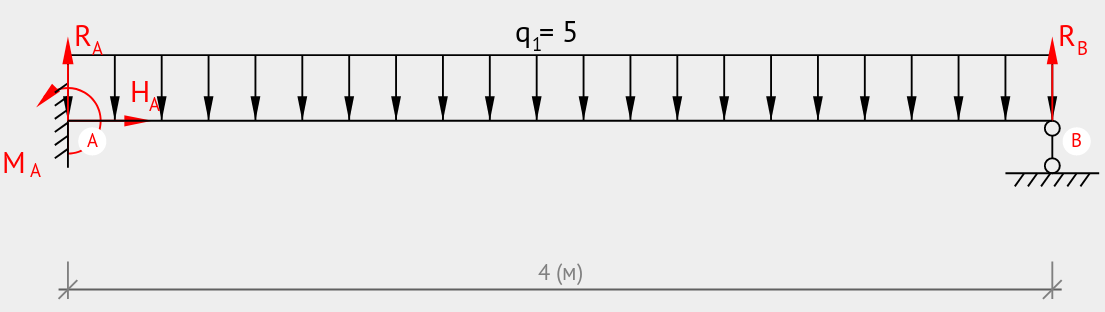

$ AB = l = 4м $

$ z $ -- расстояние от т. B до пластического шарнира, возникающего под нагрузкой q

1. Уравнения равновесия \
$\sum F_y = R_A - ql + R_B = 0 $ \
$\sum m_A = M_A - q \frac{l^2}{2} + R_B l = 0$ \
$\sum m_B = M_A +  q \frac{l^2}{2} - R_A l = 0$

1. Уравнения для внутренних моментов (используется правило знаков)\
$M_A^{прав} = - q \frac{l^2}{2} + R_B l $ \
$M_q^{прав} = - q \frac{z^2}{2} + R_B z $

1. Дополнительно, выразим z через силы:\
$ z = \frac{R_B}{q}$


(это уравнение 2 если продифференцировать уравнение для $M_q$ по z, приравнять полученное к нулю и выразить z.)
1. Будем искать максимальное значение: \
$q \rightarrow max$


Пронумеруем переменные (сначала силы реакций опор, потом внутр. моменты, искомая нагрузка, расстояние до второго шарнира):\
0. $R_A$
1. $R_B$
1. $M_A$
1. $M_q$
1. $q$

Запрограммируем уравнения и применим метод нелинейного программирования с учётом ограничивающих уравнений

In [1]:
import numpy as np
from scipy.optimize import linprog, minimize, LinearConstraint, NonlinearConstraint, Bounds
from matplotlib.pyplot import *  # для построения графиков
# выводить 4 знака после запятой, выводить маленькие (по модулю) числа как 0
np.set_printoptions(precision=2, suppress=True, linewidth=200)

In [2]:

absM = 300    # kH*m
absF = 10000  # kH
l = 3

# 0  1    2  3    4 
# Ra Rb   Ma Mq   q 

# ограничения
cons = []
cons += [{'type':'eq', 'fun': lambda x: x[0] - x[4]*l  + x[1]} ]           # Y
# сумму моментов относ т. А не приводим. т.к. уравнение для внутр. момента Ma почти такое же
# экспеременально определено: уравнение расновесия относ. т. B не позволяет найти корректный ответ.
# поэтому его тоже не приводим
# cons += [{'type':'eq', 'fun': lambda x: x[2] + x[4]*l**2 / 2  - x[0]*l} ]           # B

cons += [{'type':'eq', 'fun': lambda x: -x[2] - x[4]*   l**2/2 + x[1]*l } ]                     # Ma right

cons += [{'type':'eq', 'fun': lambda x: -x[3] - x[4]*( x[1]/x[4] ) **2/2 + x[1]* x[1]/x[4] } ]  # Mq right
# Лишние, особенно зависимые, уравнения могут мешать



# целевая функция
opt_fun = lambda x: -x[4]

# здесь важно задать начальную точку
#     Ra   Rb   Ma     Mq   q    z
x0 = [150, 150, -300,  300, 150 ]
          
# простые ограничения
bounds = ((-absF, absF), # Ra 
          (-absF, absF), # Rb
          (-absM, absM), # Ma
          (-absM, absM), # Mq
          (0.1, absF),  # q
)

# bounds = Bounds([-absF, -absF, -absM, -absM, 0.1], [absF, absF, absM, absM, absF])
          
minimize(opt_fun, x0, constraints=cons, 
         bounds=bounds, method="SLSQP")

     fun: -388.5618083163145
     jac: array([ 0.,  0.,  0.,  0., -1.])
 message: 'Optimization terminated successfully.'
    nfev: 99
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([ 682.84,  482.84, -300.  ,  300.  ,  388.56])

In [3]:
#             0        1        2        3        4 
#             Ra       Rb       Ma       Mq       q 

In [4]:
# вычислим Z
z = 362.13 / 218.57
print(f"z = {z:2.3f} м")

z = 1.657 м


 $R_A = 512.13 $
 
 $R_A = 362.13 $ 
 
 $M_A^{внутр} = -300 $
 
 $M_q^{внутр} = 300 $ 
 
 $q = 218.57$ 

### Анализ решения
- ```'Optimization terminated successfully.'```
- ```success: True```
- Ни одна сила не равна предельному значению absF

- Два предельных момента
- Моменты имеют разные знаки
- $ z < l $


### Вощможные проблемы
-  ```Inequality constraints incompatible``` -- ситсема уравнений несовместна. Нужно проверить уравнения и их запись в коде программы
- ```Singular matrix C in LSQ subproblem``` -- матрица уравнений вырождена. Уравнения линейно зависимы.Нужно проверить уравнения и их запись в коде программы. Если всё правильно, то убрать лишние уравнения.
- ```More equality constraints than independent variables``` -- уравнений больше чем неизвестных

Этот метод нелинейного программирования (SLSQP) зависит от начальных параметров задачи. Поэтому если решение неудачно, то нужно поменять x0.

Решение может получится не точным.

# Практическое занятие

1. Откройте этот файл (https://drive.google.com/file/d/1NBlZbghkB7y9MGWGUON5sb0kH4Mu9M3O/view?usp=sharing) в google colab и запустите вычисления
2. Решите аналогичную задачу, только когда нагрузка q действует на отрезок BC, где C -- центр AB
Рекомендуется сначала записать уравнения, потом скопировать содержимое ячейку с вычислениями в новую ячейку и изменять уже эту копию



3. Решите задачу, для схемы ниже

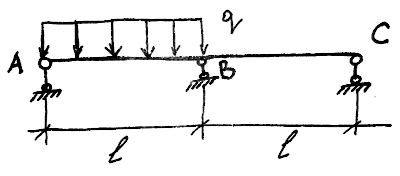

- В вариантах 1-6, нагрузка q действует на отрезок AB
- В вариантах 1-6, нагрузка q действует на отрезок BC
- l = 4 м

4. Оформите работу:
    - схема
    - уравнения
    - код в ячейке с вычислениями
    - ответ
    
5. Отправьте работу через Дискорд